In [1]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
data = pd.read_csv("../data/card_transactions.csv")

In [3]:
cust_id = data["customer_id"]

In [4]:
data.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [6]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum())

customer_id
0
balance_account
0
purchases_amount
0
paid_advance
0
full_purchases
0
balance_frequency_update
0
installments
0
purchases_frequency
0
full_purchases_frequency
0
purchases_installments_frequency
0
cash_advance_frequency
0
nr_cash_advances
0
nr_purchases
0
credit_limit
1
fixed_rate_period
0
payments
0
min_payments
298
full_payment_prc
0


In [7]:
data = data.drop(columns=["customer_id"])

In [8]:
# let's try to impute the data with KNN imputer
imputer = KNNImputer(n_neighbors=2)
data_clean = imputer.fit_transform(data)

data_clean = pd.DataFrame(data_clean, columns=data.columns)

In [9]:
data_clean

balance_account  purchases_amount  paid_advance  full_purchases  \
0            9.298409            107.60      0.000000            0.00   
1           52.666422            150.30      0.000000            0.00   
2         1360.795674              0.00    462.861443            0.00   
3         2021.641161            363.18      0.000000          363.18   
4           22.322374             95.00   1162.045833           95.00   
...               ...               ...           ...             ...   
8495      1127.607606              0.00    271.093275            0.00   
8496        21.409828            149.71      0.000000            0.00   
8497         0.000000              0.00    253.887233            0.00   
8498      1646.384530           1047.34    146.650389         1047.34   
8499      1861.087370           1752.06      0.000000         1417.18   

      balance_frequency_update  installments  purchases_frequency  \
0                     0.909091        107.60             0.909091   
1                     1.000000        150.30             1.000000   
2                     1.000000          0.00             0.000000   
3                     1.000000          0.00             1.000000   
4                     0.363636          0.00             0.083333   
...                        ...           ...                  ...   
8495                  1.000000          0.00             0.000000   
8496                  1.000000        149.71             0.916667   
8497                  0.000000          0.00             0.000000   
8498                  1.000000          0.00             0.583333   
8499                  1.000000        334.88             0.916667   

      full_purchases_frequency  purchases_installments_frequency  \
0                     0.000000                          0.818182   
1                     0.000000                          0.833333   
2                     0.000000                          0.000000   
3                     1.000000                          0.000000   
4                     0.083333                          0.000000   
...                        ...                               ...   
8495                  0.000000                          0.000000   
8496                  0.000000                          0.916667   
8497                  0.000000                          0.000000   
8498                  0.583333                          0.000000   
8499                  0.583333                          0.666667   

      cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                   0.000000               0.0          10.0        1000.0   
1                   0.000000               0.0           6.0        1000.0   
2                   0.272727               6.0           0.0        1500.0   
3                   0.000000               0.0          13.0        2000.0   
4                   0.166667               3.0           1.0        2500.0   
...                      ...               ...           ...           ...   
8495                0.083333               1.0           0.0        8500.0   
8496                0.000000               0.0          11.0        1500.0   
8497                0.111111               1.0           0.0         500.0   
8498                0.166667               2.0          51.0        3000.0   
8499                0.000000               0.0          32.0        3500.0   

      fixed_rate_period     payments  min_payments  full_payment_prc  
0                  11.0    89.868853     89.711672          0.428571  
1                   6.0    54.722514     82.955180          0.000000  
2                  11.0   303.031979    443.781316          0.000000  
3                  12.0   704.240770    795.859808          0.000000  
4                  12.0  4094.261427     40.142262          0.000000  
...                 ...          ...           ...               ...  
8495               12.0   662.387331    260.27753

In [10]:
for col in data_clean.columns:
    print(col)
    print(data_clean[col].isna().sum())

balance_account
0
purchases_amount
0
paid_advance
0
full_purchases
0
balance_frequency_update
0
installments
0
purchases_frequency
0
full_purchases_frequency
0
purchases_installments_frequency
0
cash_advance_frequency
0
nr_cash_advances
0
nr_purchases
0
credit_limit
0
fixed_rate_period
0
payments
0
min_payments
0
full_payment_prc
0


In [11]:
data_clean.drop_duplicates()

balance_account  purchases_amount  paid_advance  full_purchases  \
0            9.298409            107.60      0.000000            0.00   
1           52.666422            150.30      0.000000            0.00   
2         1360.795674              0.00    462.861443            0.00   
3         2021.641161            363.18      0.000000          363.18   
4           22.322374             95.00   1162.045833           95.00   
...               ...               ...           ...             ...   
8495      1127.607606              0.00    271.093275            0.00   
8496        21.409828            149.71      0.000000            0.00   
8497         0.000000              0.00    253.887233            0.00   
8498      1646.384530           1047.34    146.650389         1047.34   
8499      1861.087370           1752.06      0.000000         1417.18   

      balance_frequency_update  installments  purchases_frequency  \
0                     0.909091        107.60             0.909091   
1                     1.000000        150.30             1.000000   
2                     1.000000          0.00             0.000000   
3                     1.000000          0.00             1.000000   
4                     0.363636          0.00             0.083333   
...                        ...           ...                  ...   
8495                  1.000000          0.00             0.000000   
8496                  1.000000        149.71             0.916667   
8497                  0.000000          0.00             0.000000   
8498                  1.000000          0.00             0.583333   
8499                  1.000000        334.88             0.916667   

      full_purchases_frequency  purchases_installments_frequency  \
0                     0.000000                          0.818182   
1                     0.000000                          0.833333   
2                     0.000000                          0.000000   
3                     1.000000                          0.000000   
4                     0.083333                          0.000000   
...                        ...                               ...   
8495                  0.000000                          0.000000   
8496                  0.000000                          0.916667   
8497                  0.000000                          0.000000   
8498                  0.583333                          0.000000   
8499                  0.583333                          0.666667   

      cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                   0.000000               0.0          10.0        1000.0   
1                   0.000000               0.0           6.0        1000.0   
2                   0.272727               6.0           0.0        1500.0   
3                   0.000000               0.0          13.0        2000.0   
4                   0.166667               3.0           1.0        2500.0   
...                      ...               ...           ...           ...   
8495                0.083333               1.0           0.0        8500.0   
8496                0.000000               0.0          11.0        1500.0   
8497                0.111111               1.0           0.0         500.0   
8498                0.166667               2.0          51.0        3000.0   
8499                0.000000               0.0          32.0        3500.0   

      fixed_rate_period     payments  min_payments  full_payment_prc  
0                  11.0    89.868853     89.711672          0.428571  
1                   6.0    54.722514     82.955180          0.000000  
2                  11.0   303.031979    443.781316          0.000000  
3                  12.0   704.240770    795.859808          0.000000  
4                  12.0  4094.261427     40.142262          0.000000  
...                 ...          ...           ...               ...  
8495               12.0   662.387331    260.27753

In [12]:
# SEEMS NO DUPLICATES

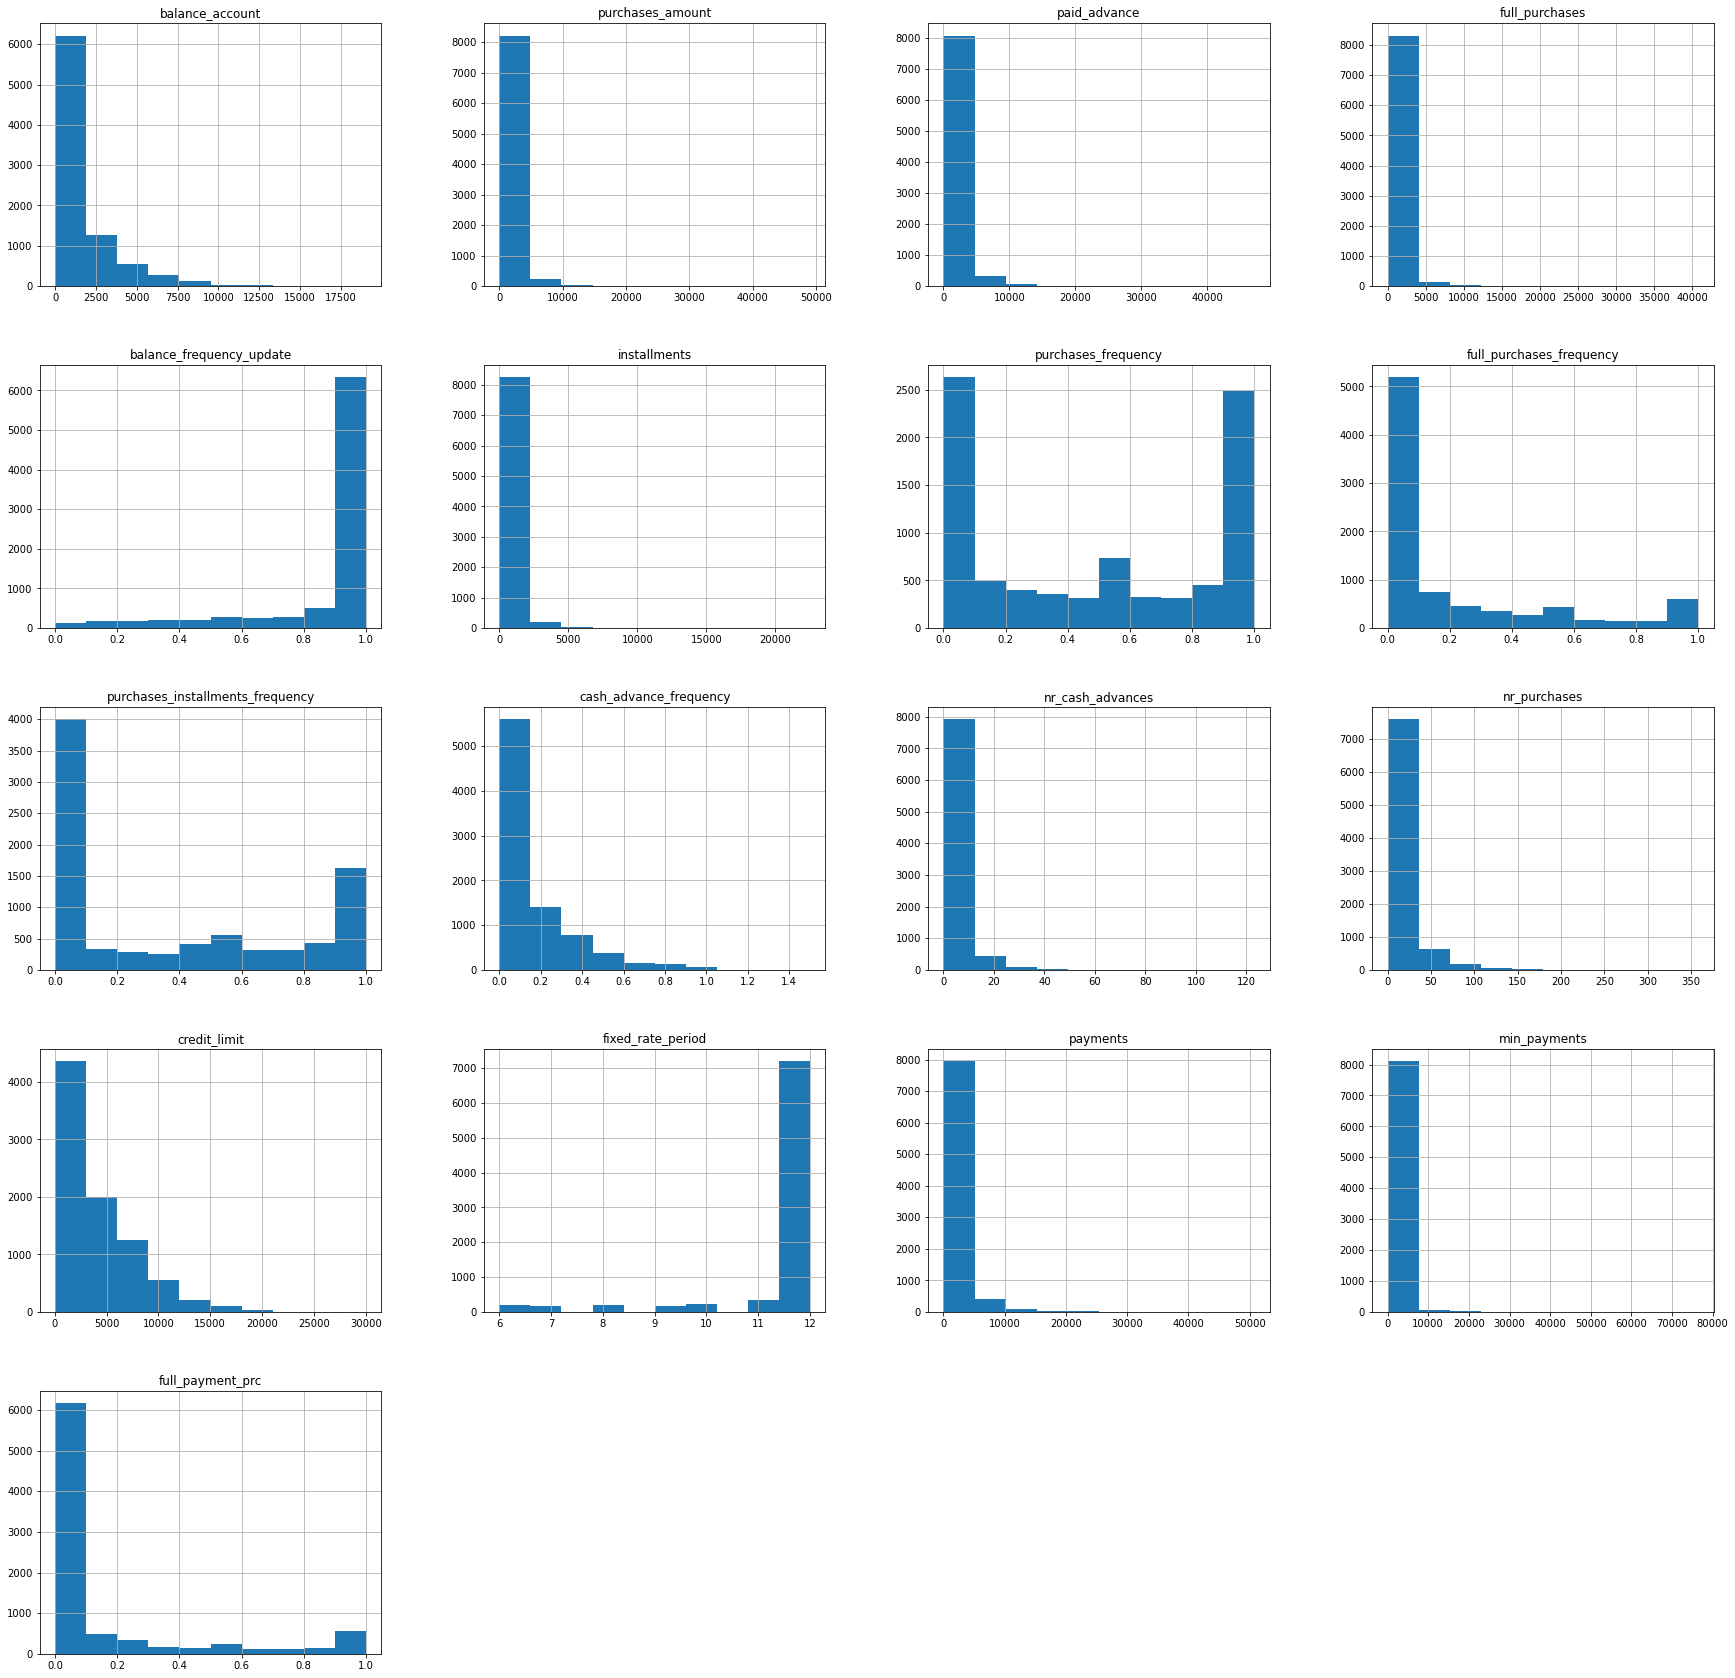

In [13]:
data.hist(figsize=(30,30))
plt.show();

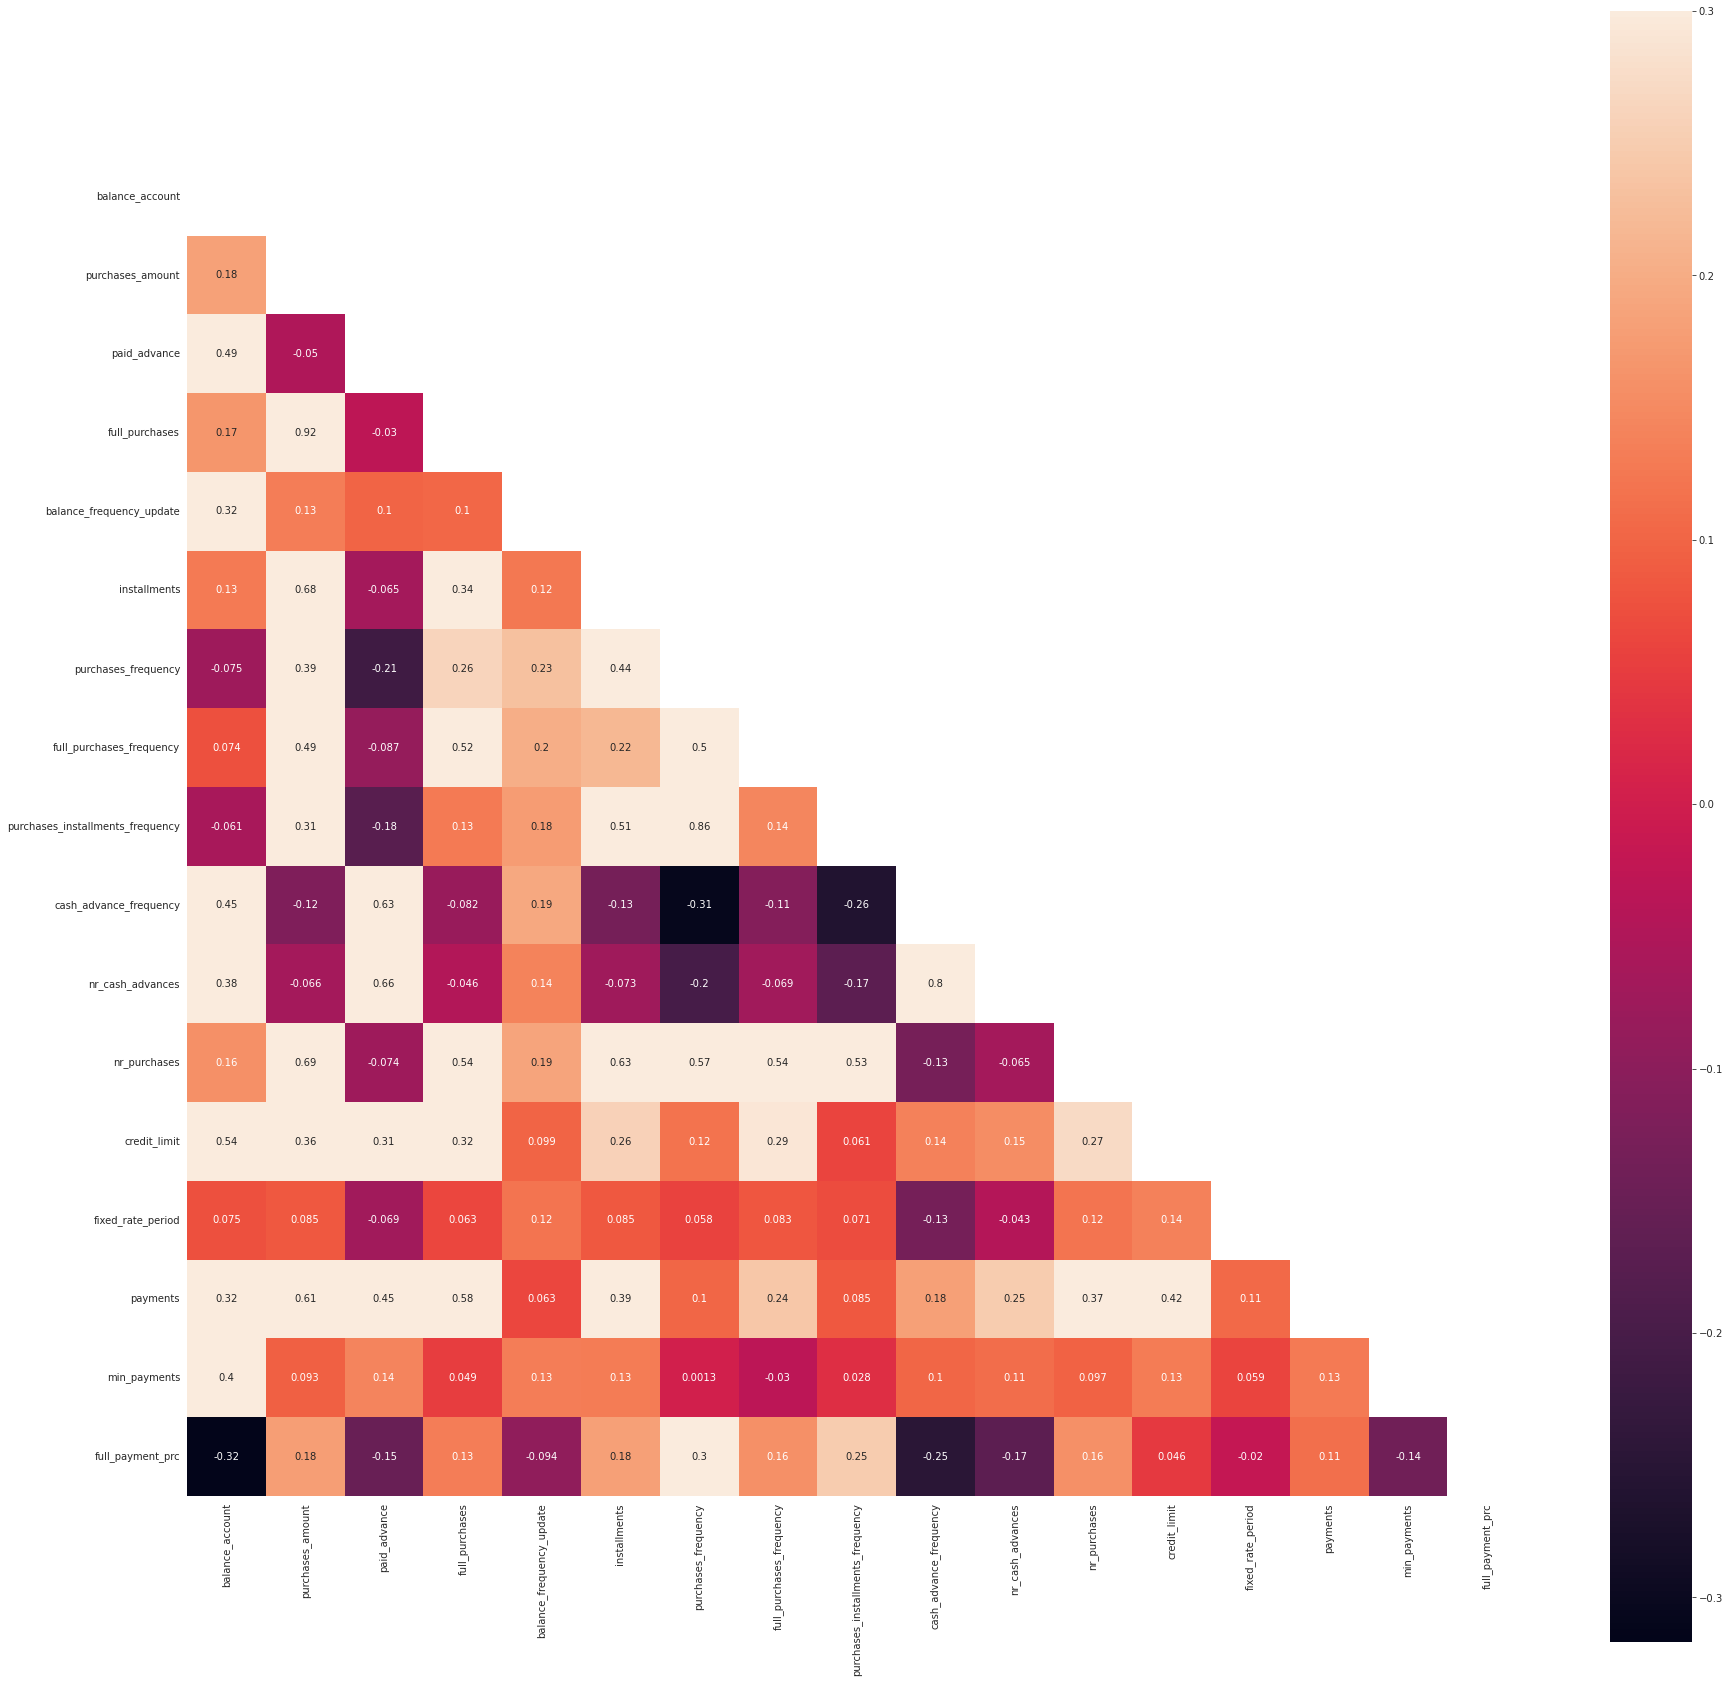

In [14]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

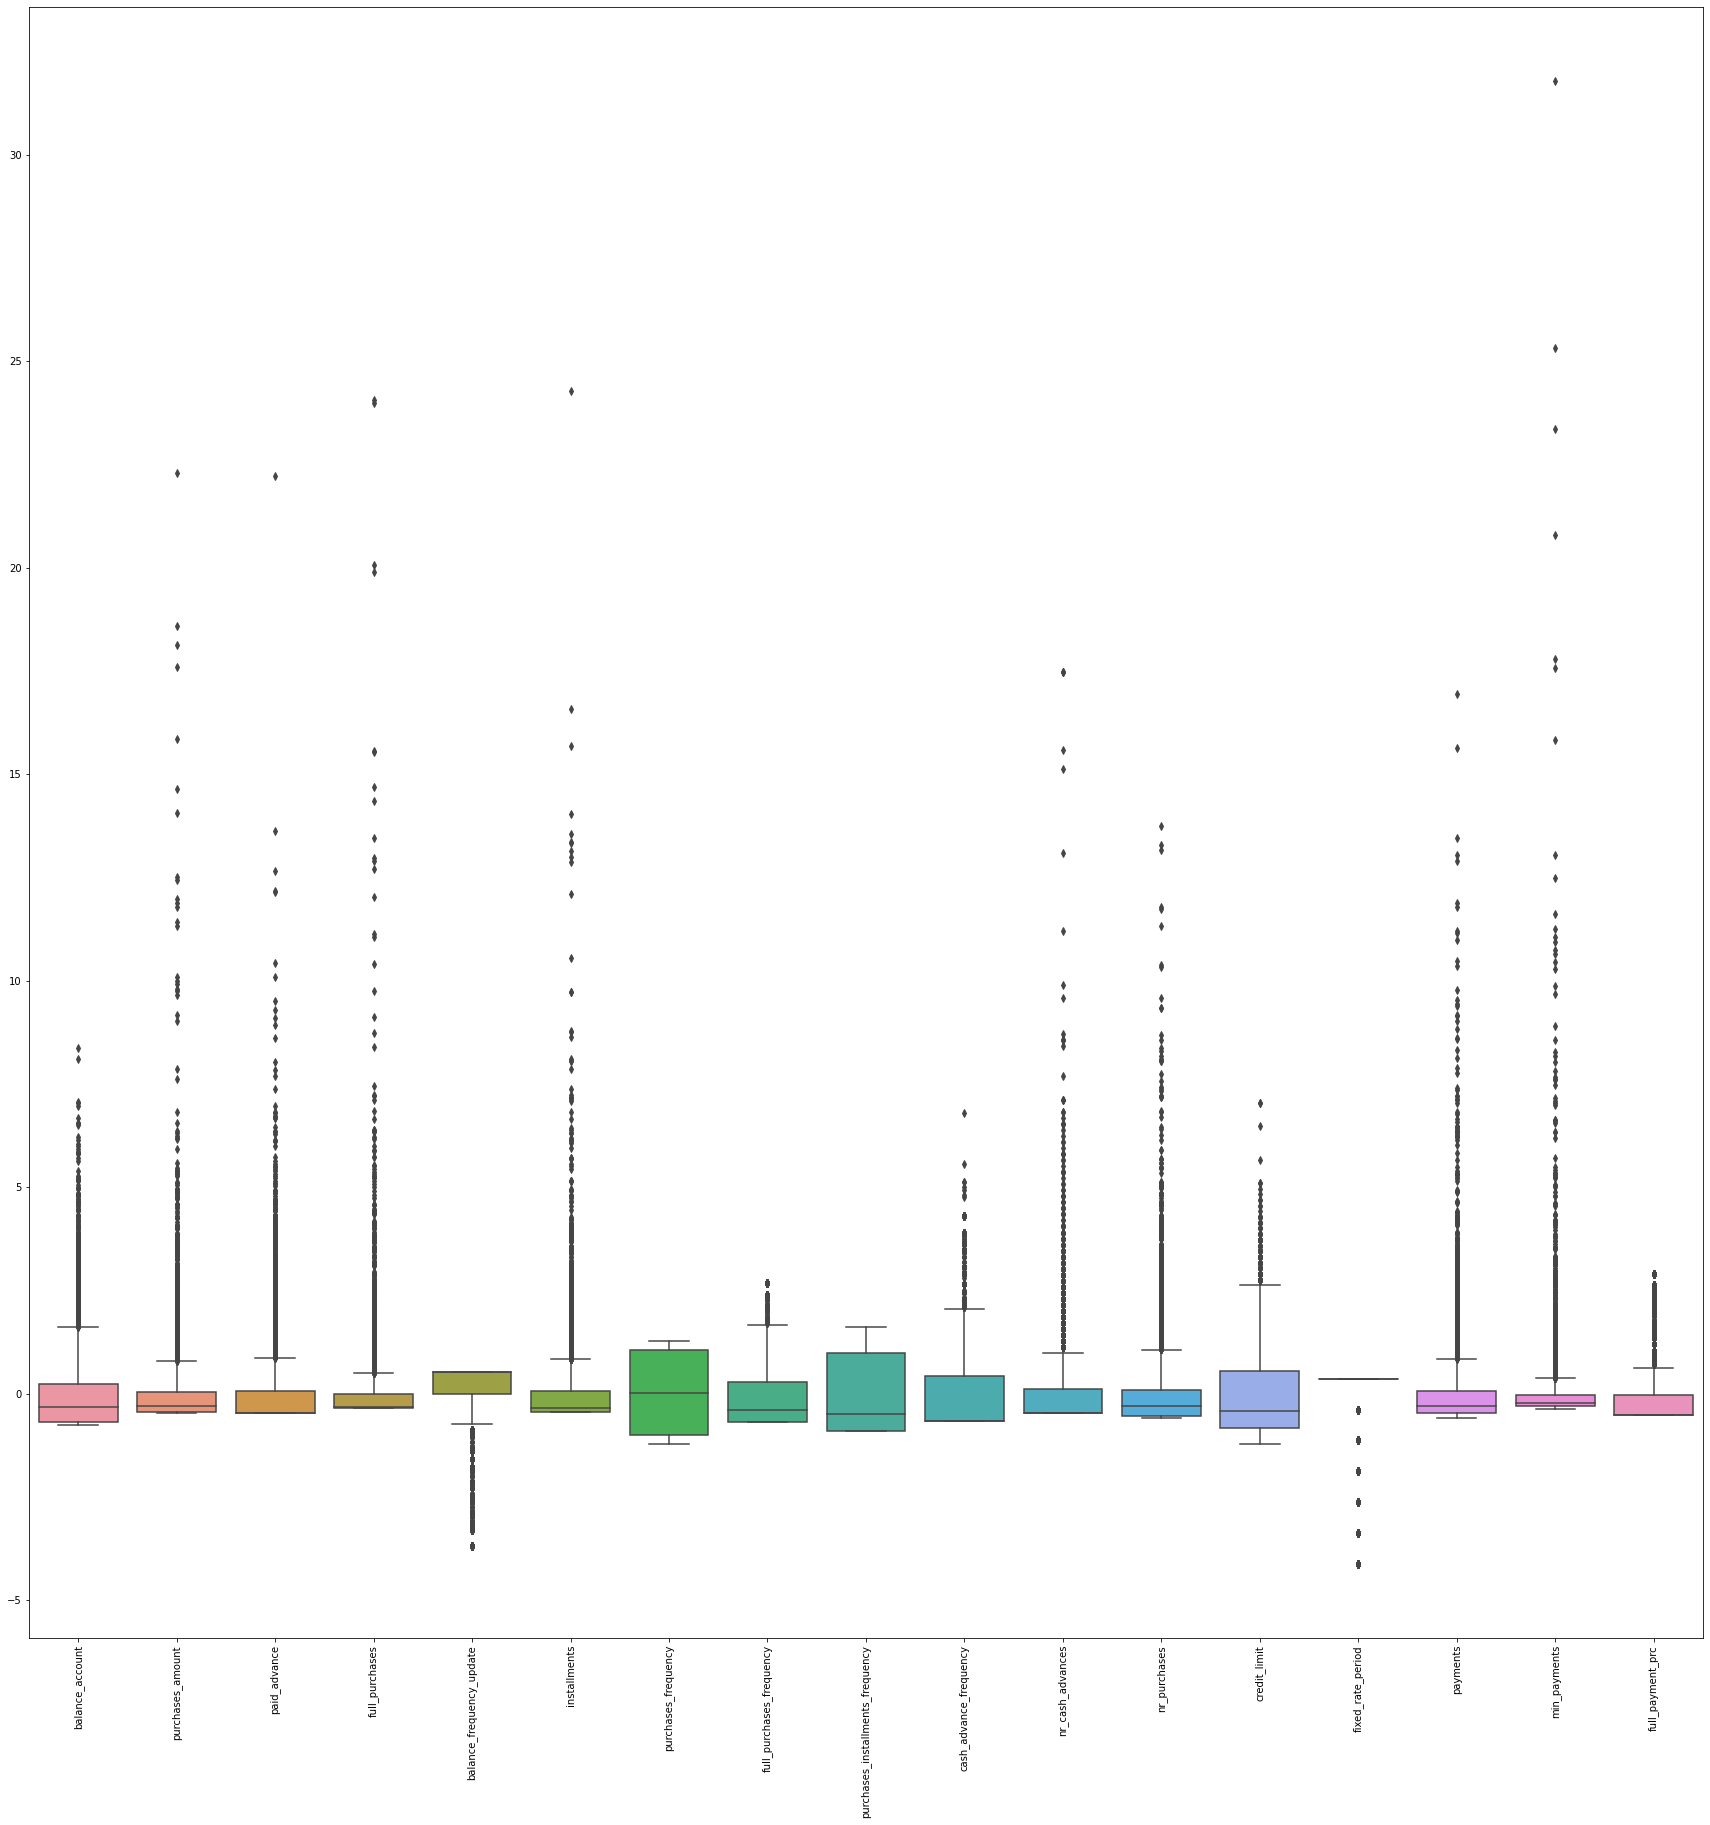

In [15]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns=data_clean.columns)
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [16]:
data_clean.describe()

balance_account  purchases_amount  paid_advance  full_purchases  \
count      8500.000000       8500.000000   8500.000000     8500.000000   
mean       1565.941403        999.561312    973.508540      588.165365   
std        2090.513302       2154.189460   2078.539061     1669.466184   
min           0.000000          0.000000      0.000000        0.000000   
25%         126.318369         39.000000      0.000000        0.000000   
50%         869.046468        360.000000      0.000000       37.400000   
75%        2053.674410       1105.897500   1113.726110      570.410000   
max       19043.138560      49039.570000  47137.211760    40761.250000   

       balance_frequency_update  installments  purchases_frequency  \
count               8500.000000   8500.000000          8500.000000   
mean                   0.876272    411.708492             0.489383   
std                    0.237517    910.142440             0.401075   
min                    0.000000      0.000000             0.000000   
25%                    0.875000      0.000000             0.083333   
50%                    1.000000     89.000000             0.500000   
75%                    1.000000    466.725000             0.916667   
max                    1.000000  22500.000000             1.000000   

       full_purchases_frequency  purchases_installments_frequency  \
count               8500.000000                       8500.000000   
mean                   0.201940                          0.363796   
std                    0.297756                          0.397162   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.083333                          0.166667   
75%                    0.285714                          0.750000   
max                    1.000000                          1.000000   

       cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
count             8500.000000       8500.000000   8500.000000   8500.000000   
mean                 0.135288          3.253647     14.677059   4485.656251   
std                  0.200892          6.854883     25.001561   3629.633860   
min                  0.000000          0.000000      0.000000     50.000000   
25%                  0.000000          0.000000      1.000000   1500.000000   
50%                  0.000000          0.000000      7.000000   3000.000000   
75%                  0.222222          4.000000     17.000000   6500.000000   
max                  1.500000        123.000000    358.000000  30000.000000   

       fixed_rate_period      payments  min_payments  full_payment_prc  
count        8500.000000   8500.000000   8500.000000       8500.000000  
mean           11.516118   1721.250989    857.343135          0.152587  
std             1.339121   2893.200899   2377.646974          0.291505  
min             6.000000      0.000000      0.019163          0.000000  
25%            12.000000    381.893717    165.879354          0.000000  
50%            12.000000    851.146952    298.933725          0.000000  
75%            12.000000   1897.014052    804.724525          0.142857  
max            12.000000  50721.483360  76406.207520          1.000000

In [17]:
r_seed = 23 

In [18]:
cluster_errors = []

for i in range(1, 30):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, 
                       # n_jobs=1
                      ),
            ),
        ]
    )
    kmeans_pipeline.fit(data_clean)
    kmeans_pipeline.predict(data_clean)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

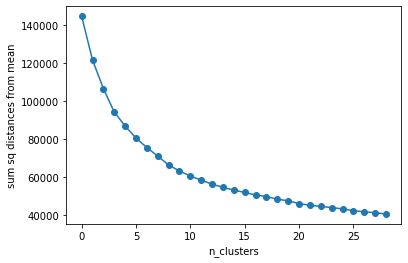

In [19]:
# elbow
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [20]:
# trying something from the day 7 solutions

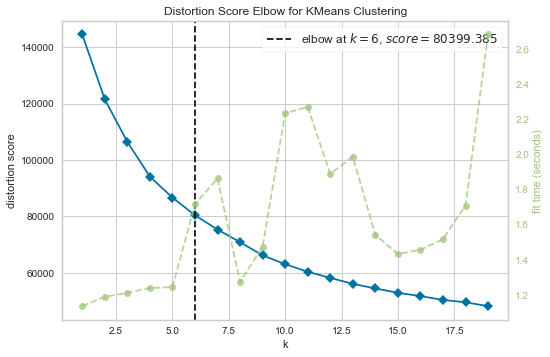

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# More fancy and viasually way to do the elbow method approach:

# Libraries and modules Installation:
# pip install yellowbrick

# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# List with Features:
features = list(data_clean.columns)

# Setting up the content of variable 'X':
X = data_clean.values
ss = StandardScaler()

#numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
#numeric_features = list(range(len(features)))

#feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = ss.fit_transform(X)

# Clustering model and visualizer:
model = KMeans(random_state=r_seed, verbose=0)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data

For n_clusters = 2 The average silhouette_score is : 0.07411737
For n_clusters = 3 The average silhouette_score is : 0.34156778
For n_clusters = 4 The average silhouette_score is : 0.0538392
For n_clusters = 5 The average silhouette_score is : -0.0015232973
For n_clusters = 6 The average silhouette_score is : 0.0039199344




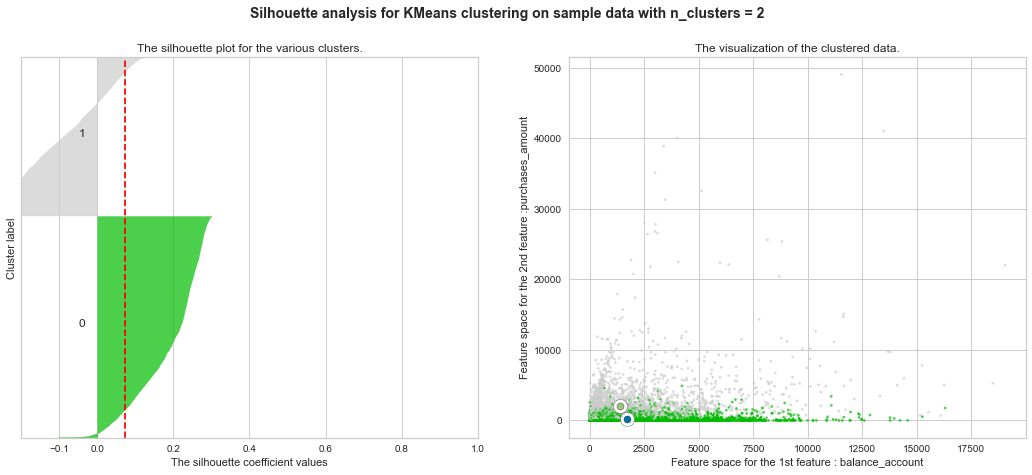

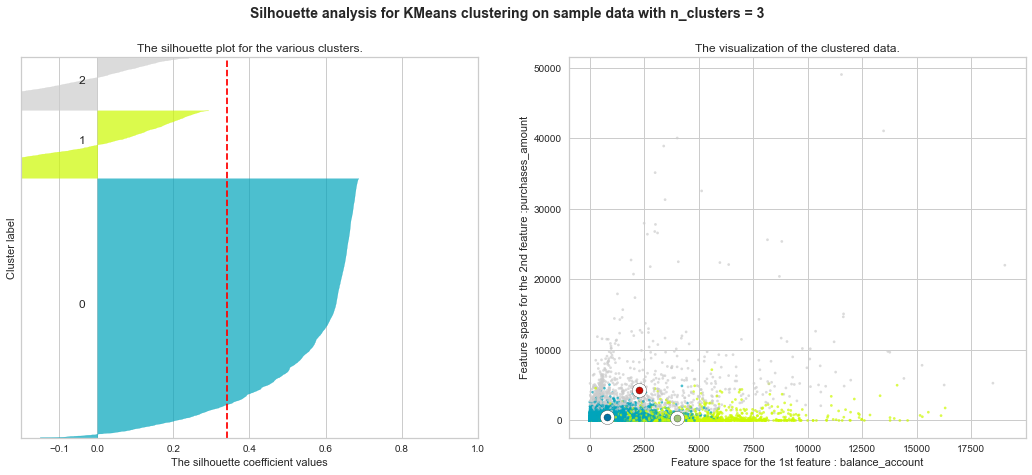

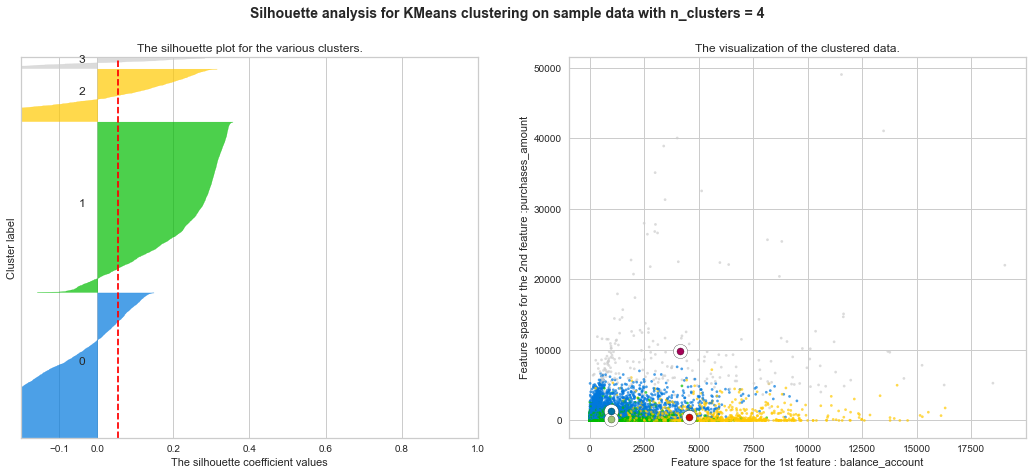

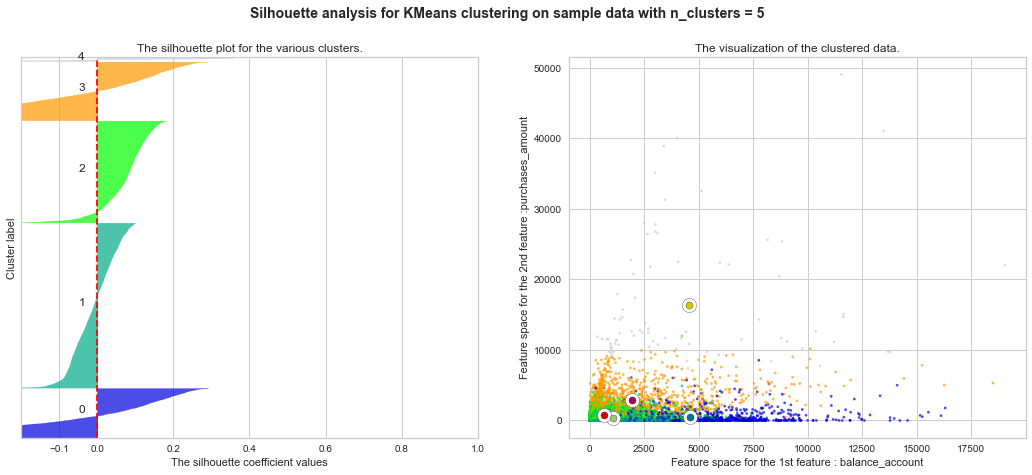

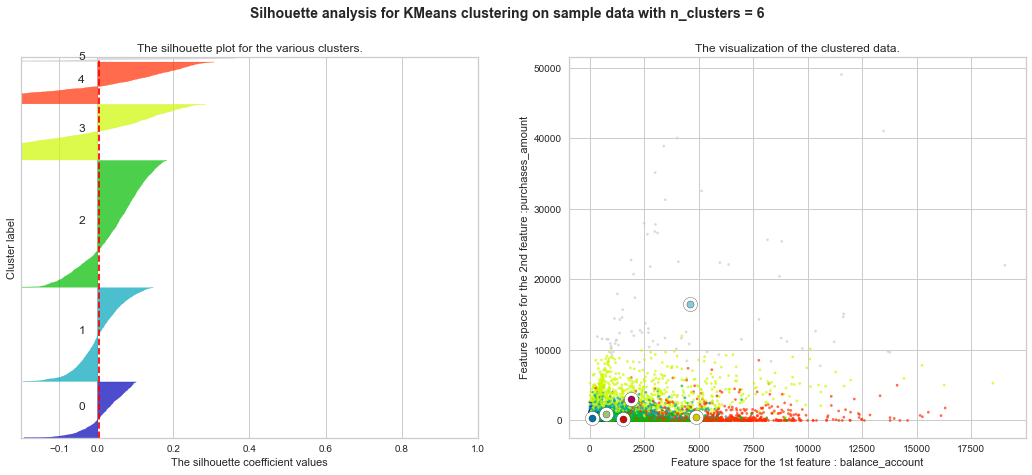

In [22]:
range_n_clusters = range(2, 7)
X = data_clean.copy()
X = X.values.astype("float32")
cols = data_clean.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0),
            ),
        ]
    )
    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

In [23]:
data_clean.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

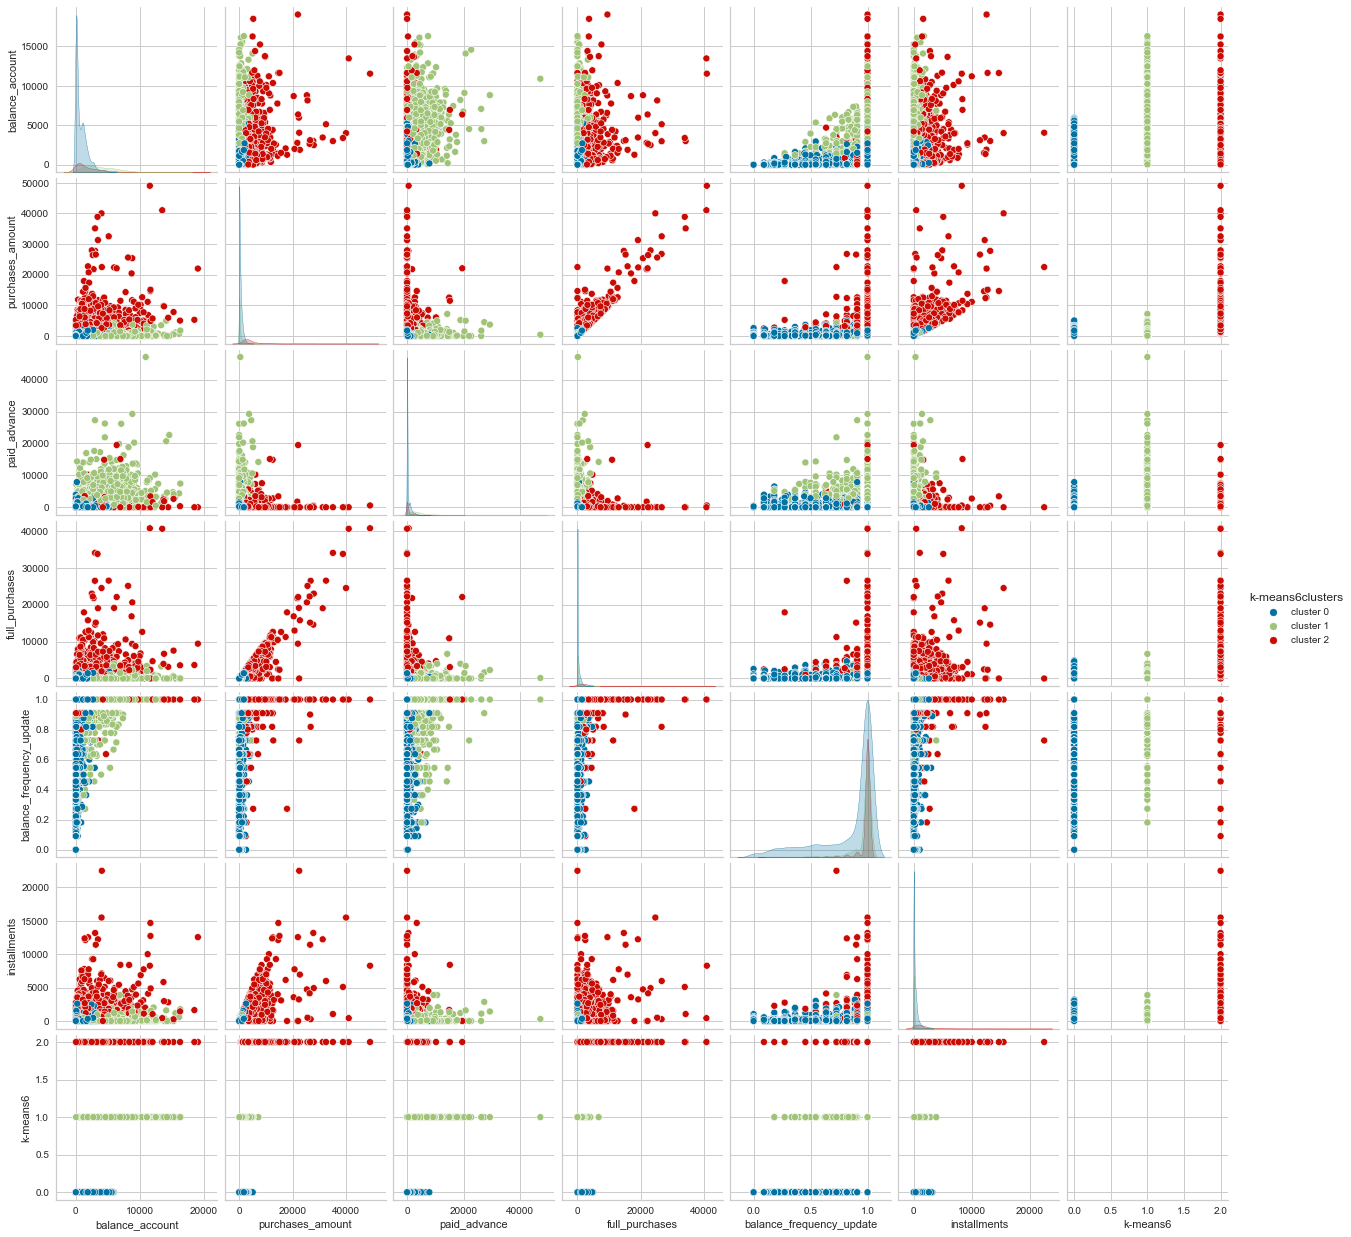

In [24]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(data_clean)
labels = kmeans_pipeline.predict(data_clean)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

cols = ['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments']
kmeans_pipeline.fit(data_clean[cols])
data_kmeans = data_clean[cols].copy()
#data_kmeans = data_no_id.copy()
data_kmeans["k-means6"] = labels
data_kmeans["k-means6clusters"] = data_kmeans["k-means6"].map(
    lambda i: "cluster " + str(i)
)

#cols = ["ball_control", "interceptions", "strength", "k-means4clusters"]
g1 = sns.pairplot(data_kmeans, hue="k-means6clusters")
g1.fig.figsize = (30, 30)

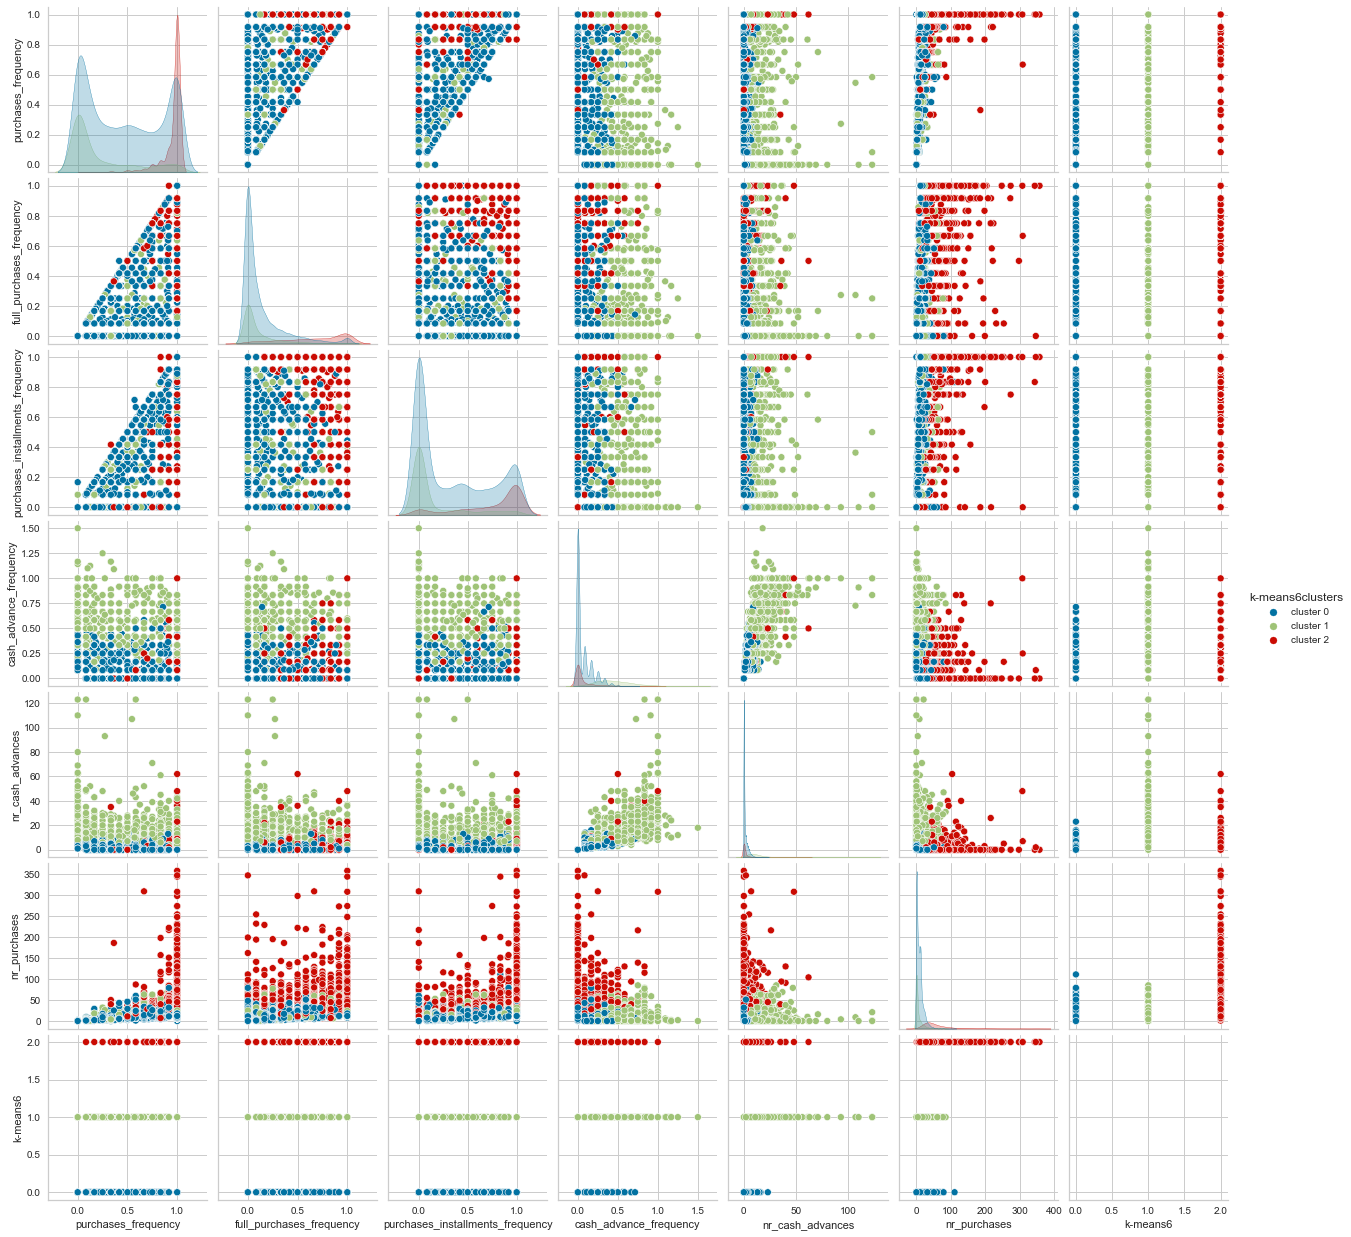

In [25]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(data_clean)
labels = kmeans_pipeline.predict(data_clean)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

cols = ['purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases']
kmeans_pipeline.fit(data_clean[cols])
data_kmeans = data_clean[cols].copy()
#data_kmeans = data_no_id.copy()
data_kmeans["k-means6"] = labels
data_kmeans["k-means6clusters"] = data_kmeans["k-means6"].map(
    lambda i: "cluster " + str(i)
)

#cols = ["ball_control", "interceptions", "strength", "k-means4clusters"]
g1 = sns.pairplot(data_kmeans, hue="k-means6clusters")
g1.fig.figsize = (30, 30)

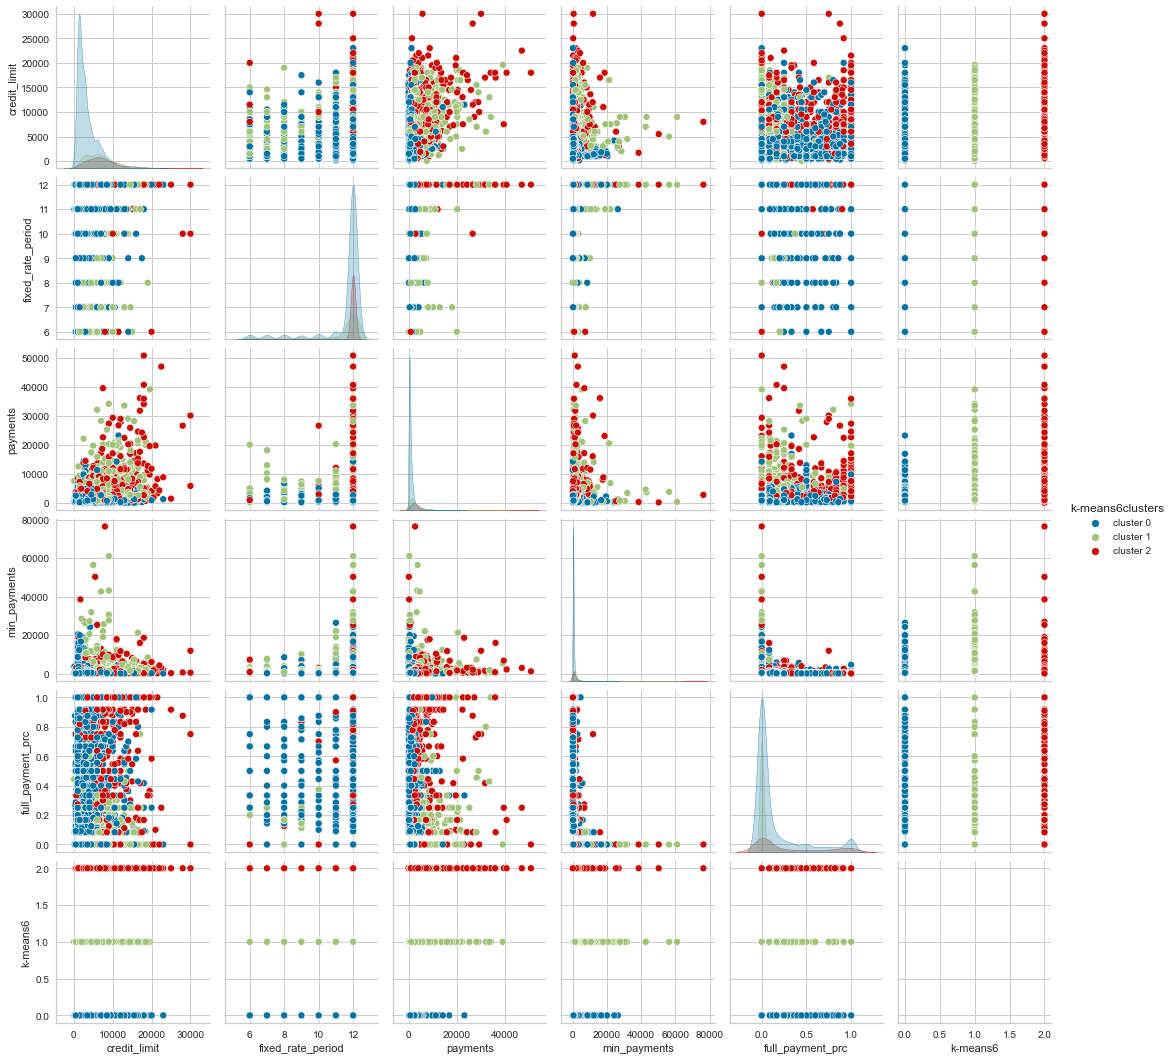

In [26]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(data_clean)
labels = kmeans_pipeline.predict(data_clean)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

cols = ['credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc']
kmeans_pipeline.fit(data_clean[cols])
data_kmeans = data_clean[cols].copy()
#data_kmeans = data_no_id.copy()
data_kmeans["k-means6"] = labels
data_kmeans["k-means6clusters"] = data_kmeans["k-means6"].map(
    lambda i: "cluster " + str(i)
)

#cols = ["ball_control", "interceptions", "strength", "k-means4clusters"]
g1 = sns.pairplot(data_kmeans, hue="k-means6clusters")
g1.fig.figsize = (30, 30)

In [27]:
data_clean.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                0.000000               0.0          10.0        1000.0   
1                0.000000               0.0           6.0        1000.0   
2                0.272727               6.0           0.0        1500.0   
3                0.000000               0.0          13.0        2000.0   
4                0.166667               3.0           1.0        2500.0   

   fixed_rate_period     payments  min_payments  full_payment_prc  
0               11.0    89.868853     89.711672          0.428571  
1                6.0    54.722514     82.955180          0.000000  
2               11.0   303.031979    443.781316          0.000000  
3               12.0   704.240770    795.859808          0.000000  
4               12.0  4094.261427     40.142262          0.000000

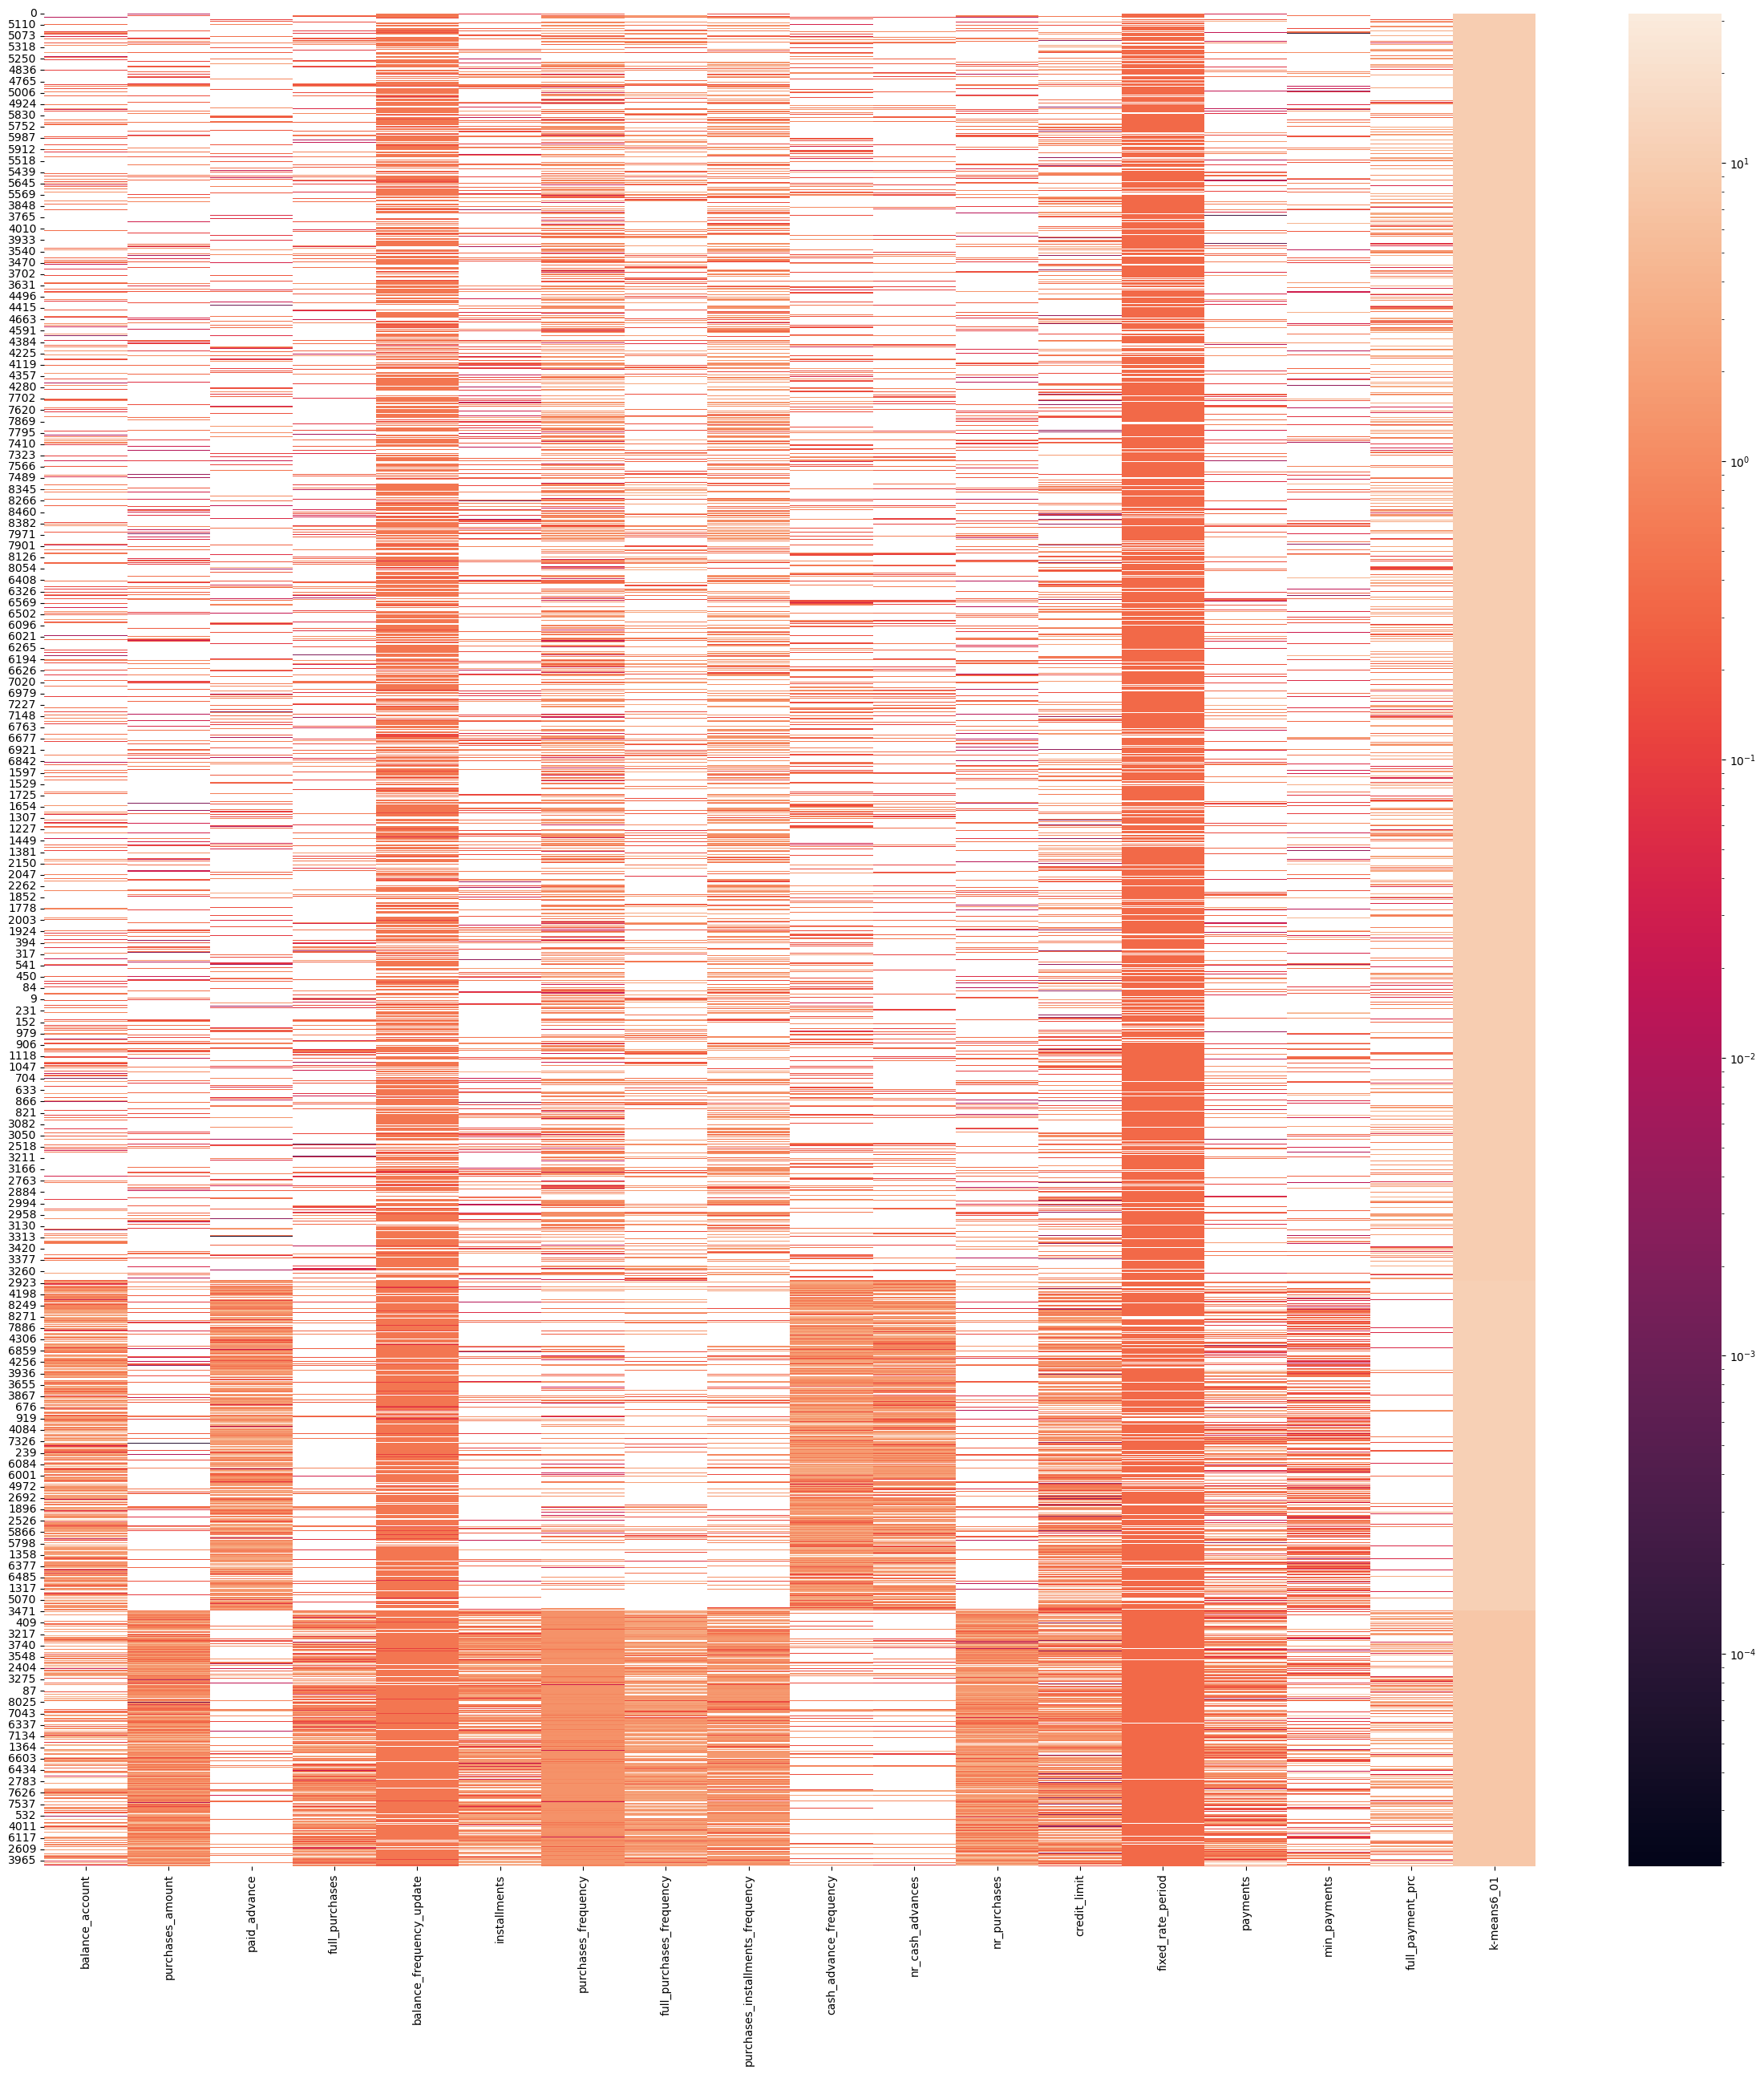

In [28]:
from matplotlib.colors import LogNorm
data_scaled["customer_id"] = cust_id.astype(str)
plt.style.use('default')
data_copy = data_scaled.copy()
data_copy["k-means6"] = data_kmeans["k-means6"]
data_copy["k-means6_01"] = 10^(data_kmeans["k-means6"])
plt.figure(figsize=(30,30))
sns.heatmap(data_copy.sort_values(by="k-means6").drop(columns=["customer_id","k-means6"]), 
            norm=LogNorm()
           );

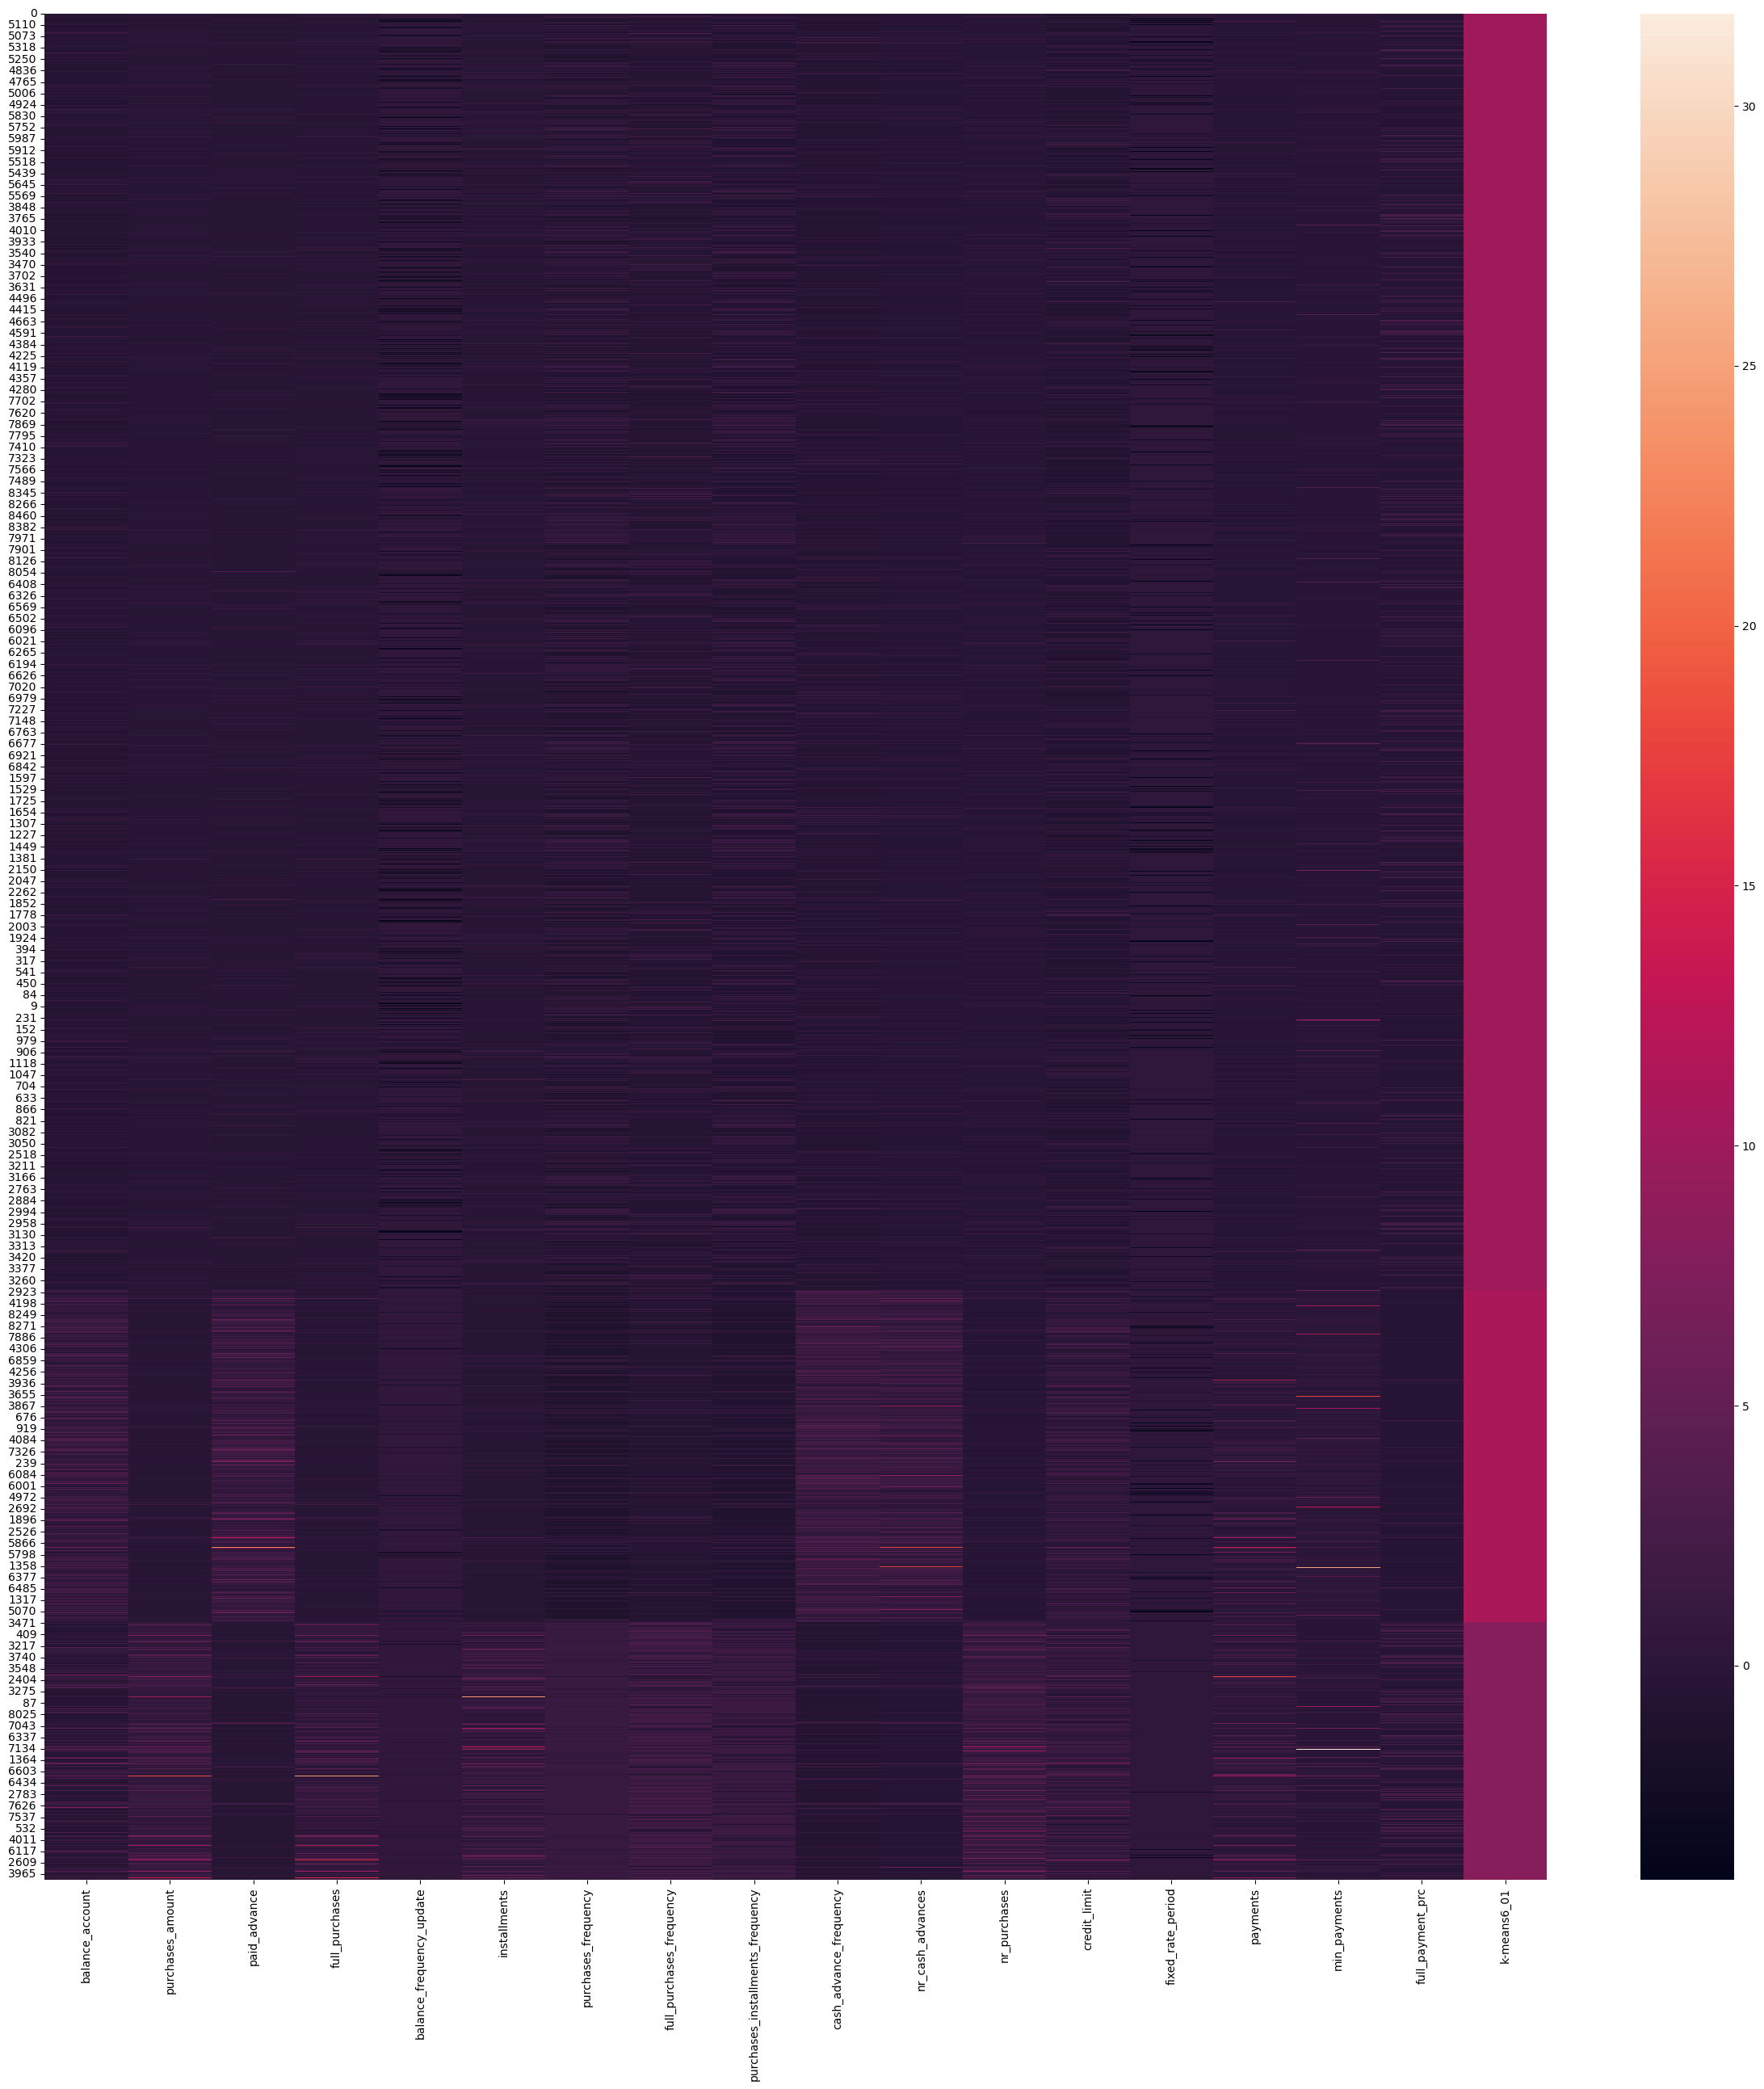

In [29]:
from matplotlib.colors import LogNorm
data_scaled["customer_id"] = cust_id.astype(str)
plt.style.use('default')
data_copy = data_scaled.copy()
data_copy["k-means6"] = data_kmeans["k-means6"]
data_copy["k-means6_01"] = 10^(data_kmeans["k-means6"])
plt.figure(figsize=(30,30))
sns.heatmap(data_copy.sort_values(by="k-means6").drop(columns=["customer_id","k-means6"]), 
            #norm=LogNorm()
           );

In [30]:
data_copy.describe()

balance_account  purchases_amount  paid_advance  full_purchases  \
count     8.500000e+03      8.500000e+03  8.500000e+03    8.500000e+03   
mean     -4.847103e-17     -4.738693e-17 -5.904427e-17   -1.061896e-17   
std       1.000059e+00      1.000059e+00  1.000059e+00    1.000059e+00   
min      -7.491144e-01     -4.640354e-01 -4.683895e-01   -3.523282e-01   
25%      -6.886862e-01     -4.459301e-01 -4.683895e-01   -3.523282e-01   
50%      -3.333803e-01     -2.969093e-01 -4.683895e-01   -3.299245e-01   
75%       2.333215e-01      4.936541e-02  6.746364e-02   -1.063598e-02   
max       8.360734e+00      2.230205e+01  2.221099e+01    2.406485e+01   

       balance_frequency_update  installments  purchases_frequency  \
count              8.500000e+03  8.500000e+03         8.500000e+03   
mean               2.033929e-16  1.609742e-16        -3.667132e-16   
std                1.000059e+00  1.000059e+00         1.000059e+00   
min               -3.689515e+00 -4.523827e-01        -1.220250e+00   
25%               -5.355546e-03 -4.523827e-01        -1.012464e+00   
50%                5.209529e-01 -3.545901e-01         2.647283e-02   
75%                5.209529e-01  6.045180e-02         1.065410e+00   
max                5.209529e-01  2.427048e+01         1.273196e+00   

       full_purchases_frequency  purchases_installments_frequency  \
count              8.500000e+03                      8.500000e+03   
mean              -2.397037e-16                     -1.126811e-16   
std                1.000059e+00                      1.000059e+00   
min               -6.782454e-01                     -9.160431e-01   
25%               -6.782454e-01                     -9.160431e-01   
50%               -3.983588e-01                     -4.963735e-01   
75%                2.813685e-01                      9.724662e-01   
max                2.680406e+00                      1.601969e+00   

       cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
count            8.500000e+03      8.500000e+03  8.500000e+03  8.500000e+03   
mean             2.458034e-16     -4.434753e-16 -1.287467e-16  2.477169e-16   
std              1.000059e+00      1.000059e+00  1.000059e+00  1.000059e+00   
min             -6.734767e-01     -4.746745e-01 -5.870802e-01 -1.222139e+00   
25%             -6.734767e-01     -4.746745e-01 -5.470804e-01 -8.226262e-01   
50%             -6.734767e-01     -4.746745e-01 -3.070812e-01 -4.093371e-01   
75%              4.327668e-01      1.088854e-01  9.291731e-02  5.550043e-01   
max              6.793675e+00      1.746979e+01  1.373287e+01  7.029867e+00   

       fixed_rate_period      payments  min_payments  full_payment_prc  \
count       8.500000e+03  8.500000e+03  8.500000e+03      8.500000e+03   
mean       -1.174747e-15 -3.748635e-17 -6.917996e-17      3.205540e-16   
std         1.000059e+00  1.000059e+00  1.000059e+00      1.000059e+00   
min        -4.119450e+00 -5.949646e-01 -3.605979e-01     -5.234758e-01   
25%         3.613645e-01 -4.629599e-01 -2.908356e-01     -5.234758e-01   
50%         3.613645e-01 -3.007587e-01 -2.348718e-01     -5.234758e-01   
75%         3.613645e-01  6.075396e-02 -2.213184e-02     -3.338054e-02   
max         3.613645e-01  1.693734e+01  3.177650e+01      2.907195e+00   

          k-means6  k-means6_01  
count  8500.000000  8500.000000  
mean      0.453647     9.902588  
std       0.723493     0.848394  
min       0.000000     8.000000  
25%       0.000000    10.000000  
50%       0.000000    10.000000  
75%       1.000000    10.000000  
max       2.000000    11.000000